In [10]:
import sys
sys.path.append('..')
from data import RecordStore, Record
from sklearn.neural_network import MLPClassifier
import numpy as np
from typing import *
import matplotlib.pyplot as plt

In [3]:
RecordStore.load()
RecordStore.load_w2v()

num_classes = len(RecordStore.classes)
num_classes, RecordStore.classes

(15,
 ['P', 'D', 'Q', 'K', 'E', 'H', 'F', 'T', 'S', 'R', 'G', 'B', 'N', 'L', 'J'])

In [4]:
def get_average_embedding(embeddings):
    if len(embeddings) == 0:
        return np.zeros(300)
    else:
        return np.mean(embeddings, axis = 0)

def get_XY(records: List[Record]):
    title_embs, synopsis_embs = [], []
    X, Y = [], []
    for i, record in enumerate(records):
        title_embs.append(get_average_embedding(record.title_embeddings_w2v))
        synopsis_embs.append(get_average_embedding(record.synopsis_embeddings_w2v))
        Y.append(record.cls_idx)

    X = np.concatenate([title_embs, synopsis_embs], axis=1)
    Y = np.array(Y)
    return X, Y

In [5]:
X_train, Y_train = get_XY(RecordStore.train_records)
X_test, Y_test = get_XY(RecordStore.test_records)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((25526, 600), (25526,), (3000, 600), (3000,))

In [14]:
mlp = MLPClassifier((600,300,100,num_classes), activation='relu', alpha=0.001, max_iter=500)
mlp.fit(X_train, Y_train)

MLPClassifier(alpha=0.001, hidden_layer_sizes=(600, 300, 100, 15), max_iter=500)

In [8]:
mlp.score(X_train, Y_train), mlp.score(X_test, Y_test) # tol 1e-4

(0.8245318498785552, 0.7096666666666667)

In [13]:
mlp.score(X_train, Y_train), mlp.score(X_test, Y_test) # tol 1e-5

(0.8211235602914675, 0.6956666666666667)

In [15]:
mlp.score(X_train, Y_train), mlp.score(X_test, Y_test) # no early stopping

(0.9952205594296012, 0.6853333333333333)

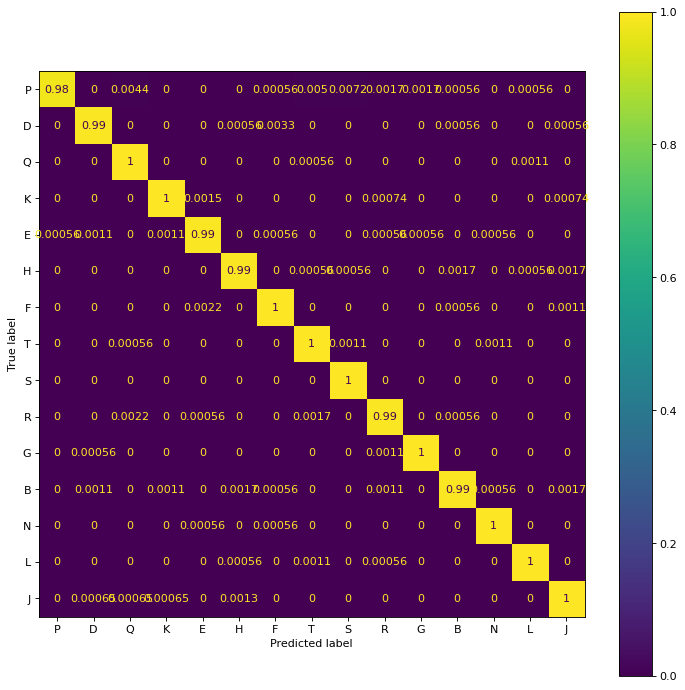

In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
plt.figure(figsize=(11,11), dpi=80)
ax = plt.axes()
ConfusionMatrixDisplay.from_predictions(Y_train, mlp.predict(X_train), display_labels=RecordStore.classes, ax=ax, normalize='true')